In [1]:
from tau_profile_parser import TauProfileParser
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly"

In [2]:
path_to_ExampleData = '/home/users/MTrappett/tau2/examples/jupyter_notebooks/ExampleData'

In [3]:
orig = TauProfileParser.parse(path_to_ExampleData+'/theta_64_flash/orig',MULTI=True)
nc_static = TauProfileParser.parse(path_to_ExampleData+'/theta_64_flash/nocall_static',MULTI=True)
nocall = TauProfileParser.parse(path_to_ExampleData+'/theta_64_flash/nocall',MULTI=True)

In [4]:
orig_df = orig.interval_data()
nc_static_df = nc_static.interval_data()
nocall_df = nocall.interval_data()

In [5]:
# number of nodes, 1 based indexing
nodes_num = 10

# for exclusive, time
orig_time = pd.DataFrame()
nc_static_time = pd.DataFrame()
nocall_time = pd.DataFrame()
for node in range(nodes_num):
    orig_time = orig_time.append(orig_df.loc[(node,0,0),('Exclusive','TIME')].T)
    nc_static_time = nc_static_time.append(nc_static_df.loc[(node,0,0),('Exclusive','TIME')].T)
    nocall_time = nocall_time.append(nocall_df.loc[(node,0,0),('Exclusive','TIME')].T)  

In [6]:
# sort the timers by Exclusive, TIME
orig_sums = orig_time.sum()
orig_sums.sort_values(ascending=False, inplace=True)
# drop the MPI TIMERS
for timer in orig_sums.index:
    if 'MPI' in timer:
#         print(timer)
        orig_sums.drop(labels=timer, inplace=True)
# the top timers
orig_top = orig_sums.head(6)
top_timers = [timer for timer in orig_top.index]

In [7]:
orig_time.reset_index(drop=True, inplace=True)
nc_static_time.reset_index(drop=True, inplace=True)
nocall_time.reset_index(drop=True, inplace=True)

In [8]:
# normalize: top_diff = ((top_diff - top_diff.min())/(top_diff.max() - top_diff.min()))

orig_time_norm = ((orig_time - orig_time.min())/(orig_time.max() - orig_time.min()))
orig_time_norm['Node'] = orig_time_norm.index
orig_time_norm['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_time_norm = ((nc_static_time - nc_static_time.min())/(nc_static_time.max() - nc_static_time.min()))
nc_static_time_norm['Node'] = nc_static_time_norm.index
nc_static_time_norm['Method'] = ['Static' for i in range(nodes_num)]

nocall_time_norm = ((nocall_time - nocall_time.min())/(nocall_time.max() - nocall_time.min()))
nocall_time_norm['Node'] = nocall_time_norm.index
nocall_time_norm['Method'] = ['NoCall' for i in range(nodes_num)]
# nocall_time_norm.sample(5)

In [9]:
orig_time['Node'] = orig_time.index
orig_time['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_time['Node'] = nc_static_time.index
nc_static_time['Method'] = ['Static' for i in range(nodes_num)]

nocall_time['Node'] = nocall_time.index
nocall_time['Method'] = ['NoCall' for i in range(nodes_num)]

In [10]:
total_df = pd.concat([orig_time_norm, nc_static_time_norm, nocall_time_norm])
non_normal_df = pd.concat([orig_time, nc_static_time, nocall_time])

## Papi Metrics

In [11]:
orig_ins = pd.DataFrame()
nc_static_ins = pd.DataFrame()
nocall_ins = pd.DataFrame()
for node in range(nodes_num):
    orig_ins = orig_ins.append(orig_df.loc[(node,0,0),('Exclusive','PAPI_TOT_INS')].T)
    nc_static_ins = nc_static_ins.append(nc_static_df.loc[(node,0,0),('Exclusive','PAPI_TOT_INS')].T)
    nocall_ins = nocall_ins.append(nocall_df.loc[(node,0,0),('Exclusive','PAPI_TOT_INS')].T) 

# reset index to make it not a multi-index
orig_ins.reset_index(drop=True, inplace=True)
nc_static_ins.reset_index(drop=True, inplace=True)
nocall_ins.reset_index(drop=True, inplace=True)

# add in the node and type columns
orig_ins['Node'] = orig_ins.index
orig_ins['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins['Node'] = nc_static_ins.index
nc_static_ins['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins['Node'] = nocall_ins.index
nocall_ins['Method'] = ['NoCall' for i in range(nodes_num)]

non_normal_ins_df = pd.concat([orig_ins, nc_static_ins, nocall_ins])

In [12]:
orig_DCM = pd.DataFrame()
nc_static_DCM = pd.DataFrame()
nocall_DCM = pd.DataFrame()
for node in range(nodes_num):
    orig_DCM = orig_DCM.append(orig_df.loc[(node,0,0),('Exclusive','PAPI_L1_DCM')].T)
    nc_static_DCM = nc_static_DCM.append(nc_static_df.loc[(node,0,0),('Exclusive','PAPI_L1_DCM')].T)
    nocall_DCM = nocall_DCM.append(nocall_df.loc[(node,0,0),('Exclusive','PAPI_L1_DCM')].T) 

# reset index to make it not a multi-index
orig_DCM.reset_index(drop=True, inplace=True)
nc_static_DCM.reset_index(drop=True, inplace=True)
nocall_DCM.reset_index(drop=True, inplace=True)

# add in the node and type columns
orig_DCM['Node'] = orig_DCM.index
orig_DCM['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_DCM['Node'] = nc_static_DCM.index
nc_static_DCM['Method'] = ['Static' for i in range(nodes_num)]

nocall_DCM['Node'] = nocall_DCM.index
nocall_DCM['Method'] = ['NoCall' for i in range(nodes_num)]

non_normal_DCM_df = pd.concat([orig_DCM, nc_static_DCM, nocall_DCM])

In [13]:
orig_STL = pd.DataFrame()
nc_static_STL = pd.DataFrame()
nocall_STL = pd.DataFrame()
for node in range(nodes_num):
    orig_STL = orig_STL.append(orig_df.loc[(node,0,0),('Exclusive','PAPI_RES_STL')].T)
    nc_static_STL = nc_static_STL.append(nc_static_df.loc[(node,0,0),('Exclusive','PAPI_RES_STL')].T)
    nocall_STL = nocall_STL.append(nocall_df.loc[(node,0,0),('Exclusive','PAPI_RES_STL')].T) 

# reset index to make it not a multi-index
orig_STL.reset_index(drop=True, inplace=True)
nc_static_STL.reset_index(drop=True, inplace=True)
nocall_STL.reset_index(drop=True, inplace=True)

# add in the node and type columns
orig_STL['Node'] = orig_STL.index
orig_STL['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_STL['Node'] = nc_static_STL.index
nc_static_STL['Method'] = ['Static' for i in range(nodes_num)]

nocall_STL['Node'] = nocall_STL.index
nocall_ins['Method'] = ['NoCall' for i in range(nodes_num)]

non_normal_STL_df = pd.concat([orig_STL, nc_static_STL, nocall_STL])

non_normal_STL_df, non_normal_ins_DCM, non_normal_ins_df, non_normal_df, 

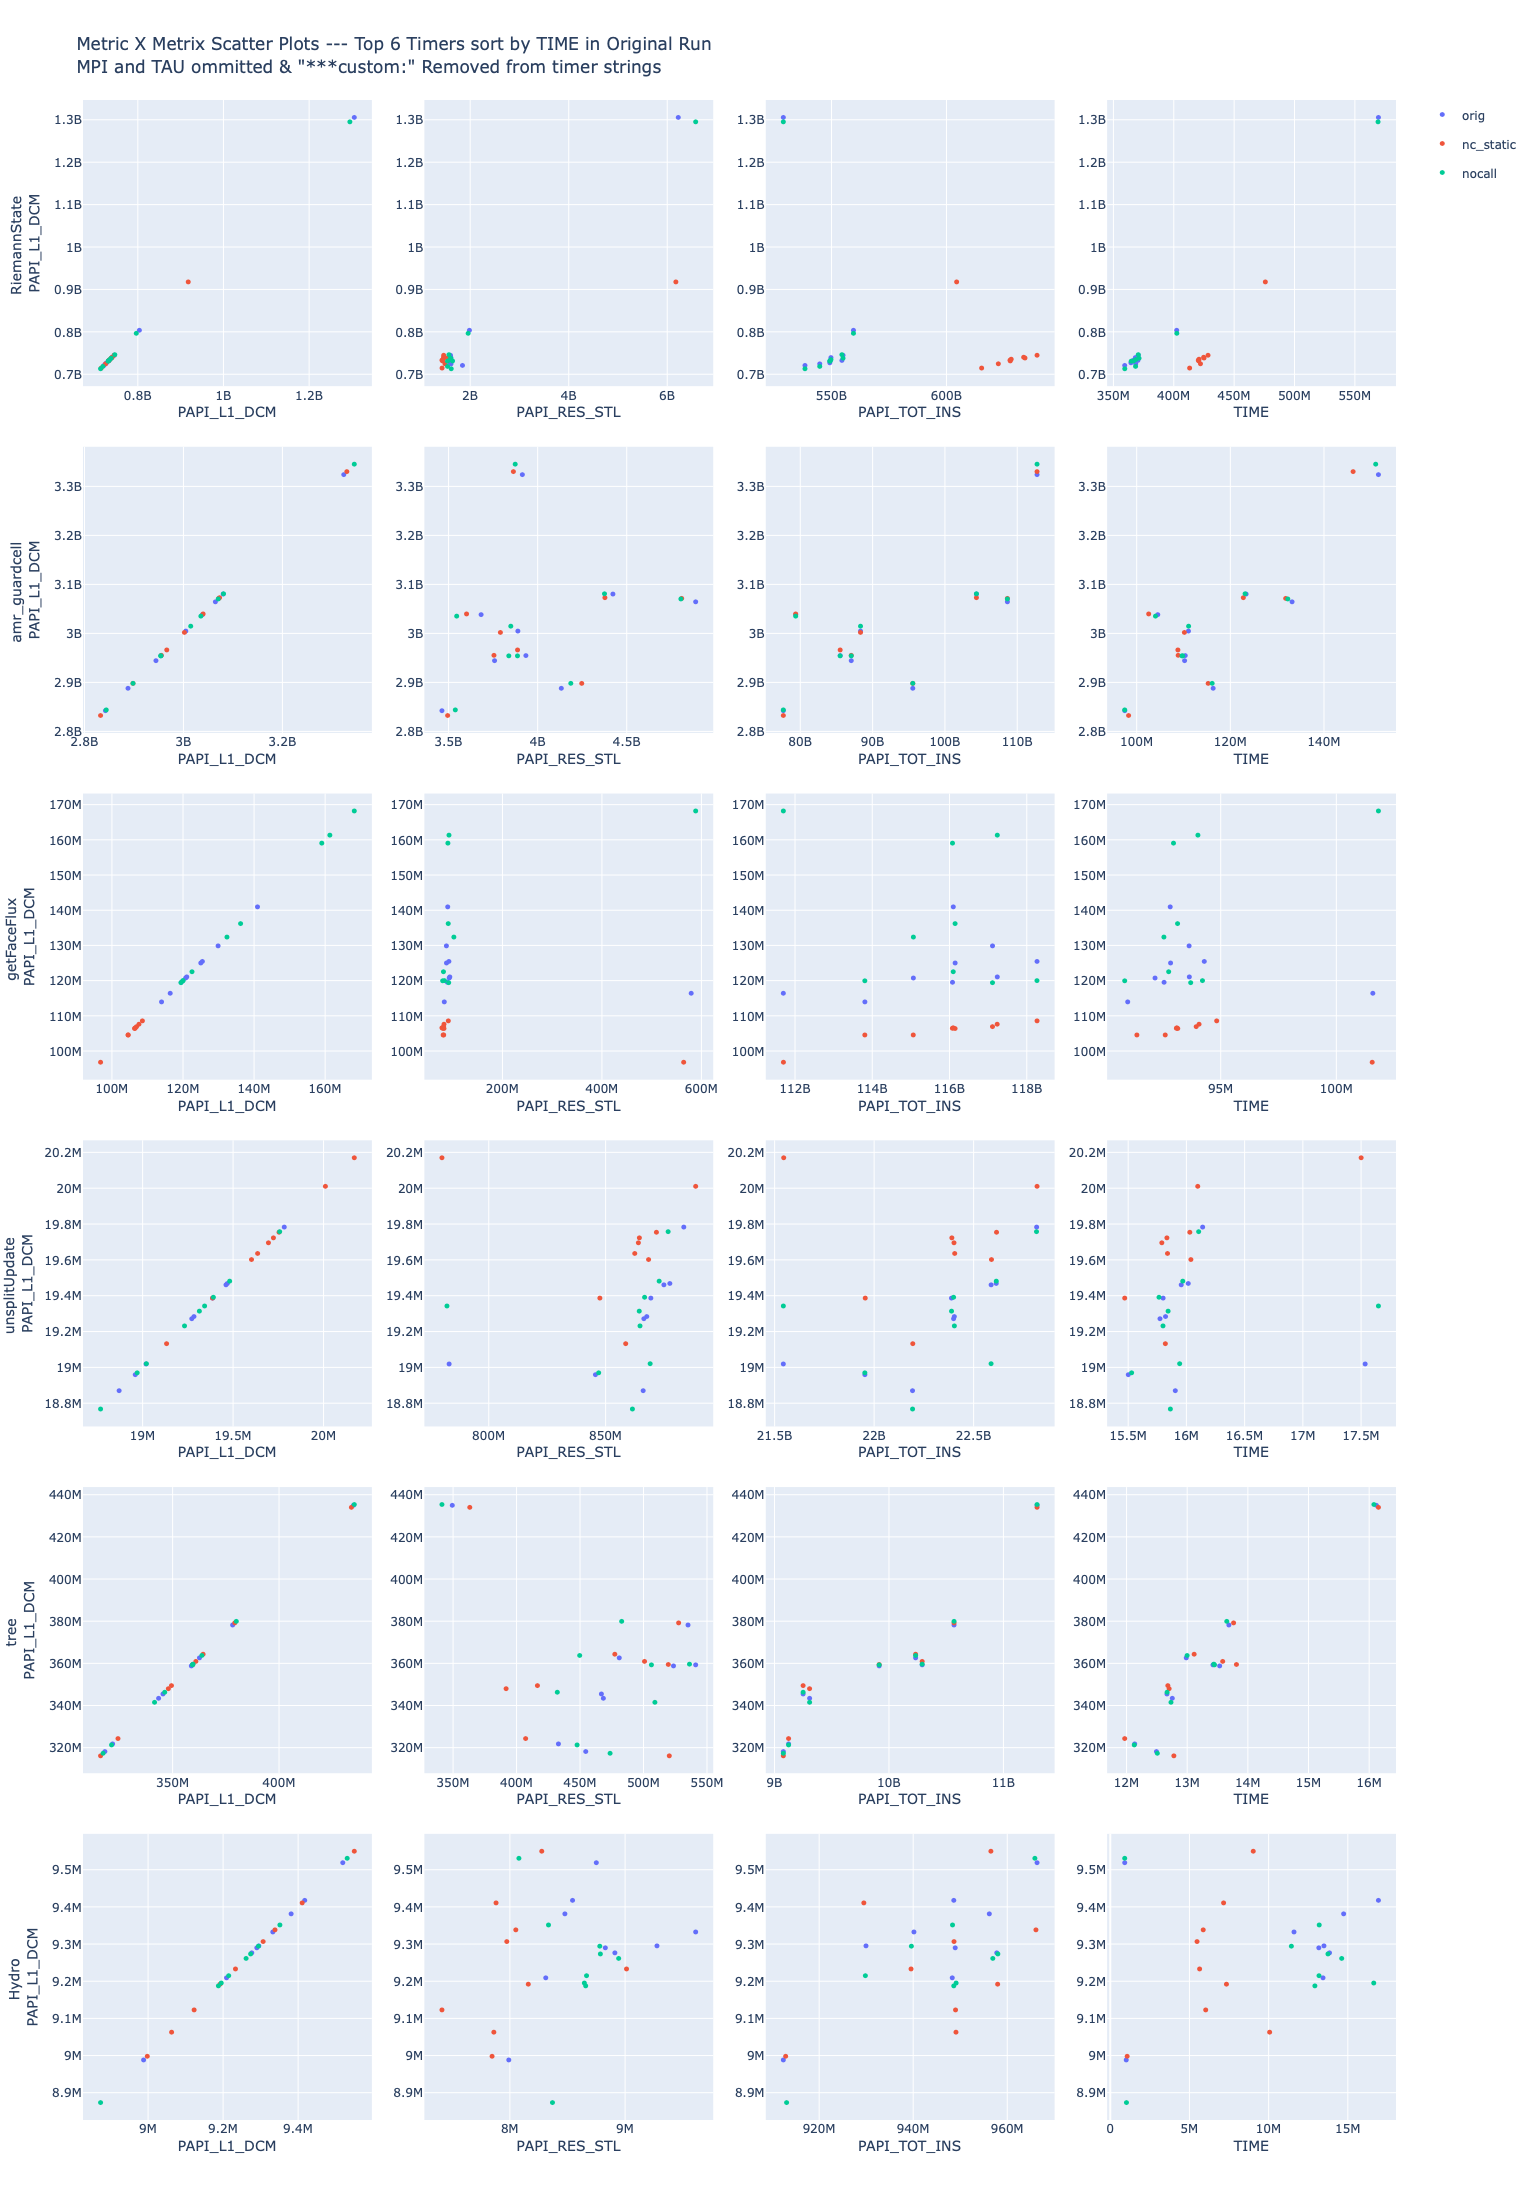

In [15]:
metrics = {'PAPI_L1_DCM':non_normal_DCM_df, 'PAPI_RES_STL':non_normal_STL_df,'PAPI_TOT_INS': non_normal_ins_df, 'TIME':non_normal_df}
fig = make_subplots(rows=len(top_timers), cols=4, vertical_spacing=0.03, horizontal_spacing=0.04)
colors = ['#636EFA', '#EF553B', '#00CC96']
legend_bool = True

row = 1
for timer in top_timers:
    m_keys = list(metrics)
#     print(m_keys, type(m_keys))
    m1 = m_keys[0]
    col = 1
    timer_text = timer.replace('*** custom:', '')
    fig.update_yaxes(title_text=timer_text + ' <br> ' +  m1, row=row, col=col, title_standoff = 5)
    for m2 in m_keys:
        fig.add_trace(go.Scatter(x=metrics[m2][timer][0:nodes_num-1], y=metrics[m1][timer][0:nodes_num-1], mode='markers', marker_color=colors[0], marker_size=5,
                                 name='orig', legendgroup='orig', showlegend=legend_bool, text=non_normal_df['Node'][0:nodes_num-1]), row=row, col=col)
        fig.add_trace(go.Scatter(x=metrics[m2][timer][nodes_num:2*nodes_num-1], y=metrics[m1][timer][nodes_num:2*nodes_num-1], mode='markers', marker_color=colors[1], marker_size=5,
                                 name='nc_static', legendgroup='nc_static', showlegend=legend_bool, text=non_normal_df['Node'][nodes_num:2*nodes_num-1],), row=row, col=col)
        fig.add_trace(go.Scatter(x=metrics[m2][timer][2*nodes_num:3*nodes_num-1], y=metrics[m1][timer][2*nodes_num:3*nodes_num-1], mode='markers', marker_color=colors[2], marker_size=5,
                                 name='nocall', legendgroup='nocall', showlegend=legend_bool, text=non_normal_df['Node'][2*nodes_num:3*nodes_num-1],), row=row, col=col)
        
        fig.update_xaxes(title_text=m2, row=row, col=col, title_standoff = 5)

        
        legend_bool = False
        col+=1
    
    row+=1

title= 'Metric X Metrix Scatter Plots --- Top '+str(len(top_timers)) +' Timers sort by TIME in Original Run <br> MPI and TAU ommitted & "***custom:" Removed from timer strings'
fig.update_layout(height=2200, width=1500, title=title)
# fig.write_html("/home/users/MTrappett/Flash5_theta/MetricXMetric_scatter_plots_Theta64.html")
fig.show()          